In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.labelsize']        = 12
plt.rcParams['axes.titlesize']        = 12
plt.rcParams['xtick.labelsize']       = 12
plt.rcParams['ytick.labelsize']       = 12
plt.rcParams['font.family']           = 'serif'
plt.rcParams['font.size']             = 12

This notebook produces a corner plot showing showcasing the values of various cosmological parameters in example tier 1 and 2 training sets.

In [2]:
# loading data
tier1 = np.loadtxt('training_data/pmm_w0wamnu_noisy_ZCV_tier1/params.txt', unpack=True)
tier1 = np.array(tier1[:,-224:]) # truncating to 250/400 samples
tier2 = np.loadtxt('training_data/pmm_w0wamnu_noisy_ZCV_tier2/params.txt', unpack=True)
tier2 = np.array(tier2[:,-80:])# truncating to 100/200 samples

/var/folders/bl/xyxyl0d10p91mlywms1l_wph0000gn/T/ipykernel_26838/1781661964.py:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, title='Training Data', labels=['Tier 1, $N=224$', 'Tier 2, $N=80$'])


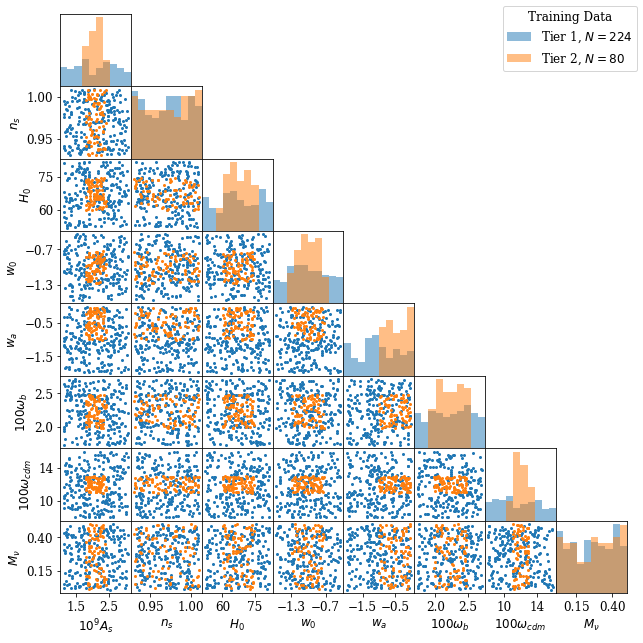

In [3]:
fig, axes = plt.subplots(8, 8, figsize=(9, 9))

labels = [r'$10^9A_s$', r'$n_s$', r'$H_0$', r'$w_0$', r'$w_a$', r'$100\omega_b$', r'$100\omega_{cdm}$', r'$M_{\nu}$']
lines = []
ticks = [[1.5, 2.5], [0.95, 1.00], [60, 75], [-1.3, -0.7], [-1.5, -0.5],
         [2.0, 2.5], [10.0, 14.0], [0.15, 0.4]] 

for i in range(len(labels)):
    for j in range(len(labels)):
        ax = axes[i, j]
        if j > i:
            ax.axis('off')
            continue
        elif i == j:
            data1 = 1e9 * tier1[i] if i == 0 else (100 * tier1[i] if i in [5, 6] else tier1[i])
            data2 = 1e9 * tier2[i] if i == 0 else (100 * tier2[i] if i in [5, 6] else tier2[i])

            ax.hist(data1, alpha=0.5, density=True, color='C0')
            bin_width = (max(data1) - min(data1)) / 10.
            bins = np.arange(min(data1), max(data2) + bin_width, bin_width)
            ax.hist(data2, alpha=0.5, bins=bins, density=True, color='C1')

            if i == 7 or i == 0:
                ax.set_xlabel(labels[i])
                ax.set_xticks(ticks[i])
            else:
                ax.set_xticks([])

            ax.set_xlim(min(data1), max(data1))
            ax.set_yticks([])

        else:
            x1 = 1e9 * tier1[j] if j == 0 else (100 * tier1[j] if j in [5, 6] else tier1[j])
            y1 = 1e9 * tier1[i] if i == 0 else (100 * tier1[i] if i in [5, 6] else tier1[i])
            x2 = 1e9 * tier2[j] if j == 0 else (100 * tier2[j] if j in [5, 6] else tier2[j])
            y2 = 1e9 * tier2[i] if i == 0 else (100 * tier2[i] if i in [5, 6] else tier2[i])

            line1 = ax.scatter(x1, y1, s=4)
            line2 = ax.scatter(x2, y2, s=4)
            lines = [line1, line2]

            if j == 0:
                ax.set_ylabel(labels[i])
                ax.set_yticks(ticks[i])
            else:
                ax.set_yticks([])

            if i == 7:
                ax.set_xlabel(labels[j])
                ax.set_xticks(ticks[j])
            else:
                ax.set_xticks([])

fig.legend(lines, title='Training Data', labels=['Tier 1, $N=224$', 'Tier 2, $N=80$'])
fig.tight_layout()
fig.subplots_adjust(wspace=0., hspace=0.)
fig.savefig('figures/tier1_tier2_corner_plots.pdf')
